In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from numpy.linalg import eigh
import numpy as np
import htwt

In [4]:
X, y = htwt.get()
X = X[y == 1]

In [21]:
def contour(center, cov):
    vals, vecs = eigh(cov)
    order = vals.argsort()[::-1]
    vals = vals[order]
    vecs = vecs[:, order]
    nstd = 2
    width, height = 2 * nstd * np.sqrt(vals)
    theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
    return Ellipse(xy = center, width = width, height = height, angle = theta, fill = False, edgecolor = 'blue')

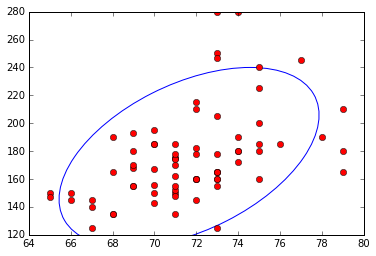

In [22]:
plt.plot(X[:, 0], X[:, 1], 'ro')
x_bar = np.mean(X, axis = 0)
Sigma = np.cov(X, ddof = 0, rowvar = False)
plt.gca().add_artist(contour(x_bar, Sigma))
plt.show()